## By Samaksh Sood

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
w_data = pd.read_csv("weatherHistory.csv")
w_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [34]:
w_data.shape

(96453, 11)

In [35]:
w_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [36]:
w_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [37]:
w_data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [38]:
w_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [39]:
#Checking Wheather this dataset has Duplicate Values or not
sum(w_data.duplicated())

24

### Exploratory Data Analysis

In [40]:
#Number of Distinct Observation 
w_data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [42]:
#DataFrame for Duplicate Values
data_duplicated = w_data[w_data.duplicated()]
data_duplicated.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
36072,2010-08-02 00:00:00.000 +0200,Clear,rain,18.800000,18.800000,0.93,6.2790,270,14.9086,1016.99,Partly cloudy starting in the afternoon contin...
36073,2010-08-02 01:00:00.000 +0200,Clear,rain,18.222222,18.222222,0.97,6.2790,291,14.9086,1017.09,Partly cloudy starting in the afternoon contin...
36074,2010-08-02 02:00:00.000 +0200,Clear,rain,18.072222,18.072222,0.98,11.2700,290,6.8425,1013.23,Partly cloudy starting in the afternoon contin...
36075,2010-08-02 03:00:00.000 +0200,Clear,rain,16.622222,16.622222,0.99,6.4400,300,11.9784,1016.78,Partly cloudy starting in the afternoon contin...
36076,2010-08-02 04:00:00.000 +0200,Clear,rain,16.094444,16.094444,0.99,3.0751,280,11.9784,1016.67,Partly cloudy starting in the afternoon contin...


In [43]:
w_data.isna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
96448,False,False,False,False,False,False,False,False,False,False,False
96449,False,False,False,False,False,False,False,False,False,False,False
96450,False,False,False,False,False,False,False,False,False,False,False
96451,False,False,False,False,False,False,False,False,False,False,False


In [49]:
#Droping NaN(Not a Number)
data_target = w_data.dropna()
data_target.shape

(95936, 11)

In [50]:
data_target = data_target.set_index("Formatted Date")
data_target

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


Given:

The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".

The Alternative Hypothesis H1 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming".

In [52]:
col = ['Formatted Date', 'Apparent Temperature (C)', 'Humidity', 'Daily Summary']
w_data= w_data[col]
w_data.head()

,Formatted Date,Apparent Temperature (C),Humidity,Daily Summary
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,Partly cloudy throughout the day.


In [53]:
w_data['Formatted Date'] = pd.to_datetime(w_data['Formatted Date'], utc=True)
w_data = w_data.set_index('Formatted Date')
w_data = w_data.resample('M').mean()

In [54]:
w_data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


### Data Visualization 

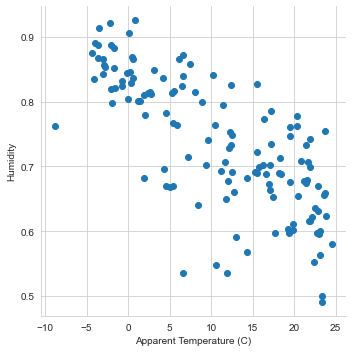

In [56]:
sns.set_style("whitegrid")
sns.FacetGrid(w_data, height=5).map(plt.scatter, "Apparent Temperature (C)", "Humidity")
plt.show()

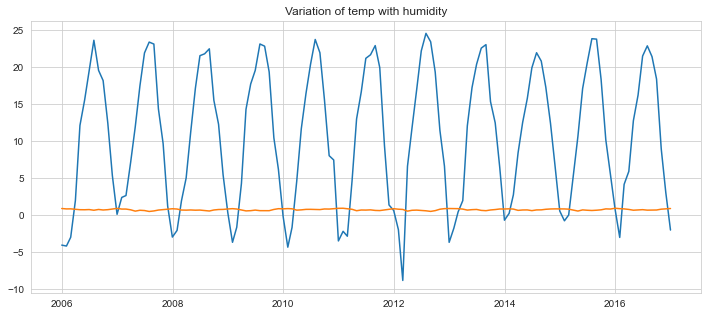

In [57]:
plt.figure(figsize=(12,5))
plt.title('Variation of temp with humidity')
plt.plot(w_data)

Observation:
"Humidity" is remain constant from 2006 - 2016
But "Apparent Temperature (C)" is frequently changes from 2006 - 2016

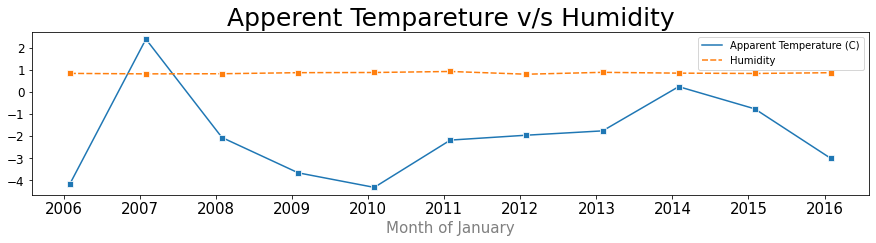

In [13]:
january_data = w_data[w_data.index.month==1]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of January", fontsize=15, color="gray")
sns.lineplot(data=january_data, marker='s')

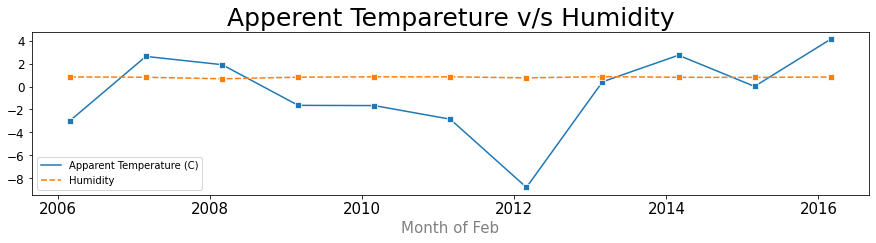

In [14]:
feb_data = w_data[w_data.index.month==2]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of Feb", fontsize=15, color="gray")
sns.lineplot(data=feb_data, marker='s')

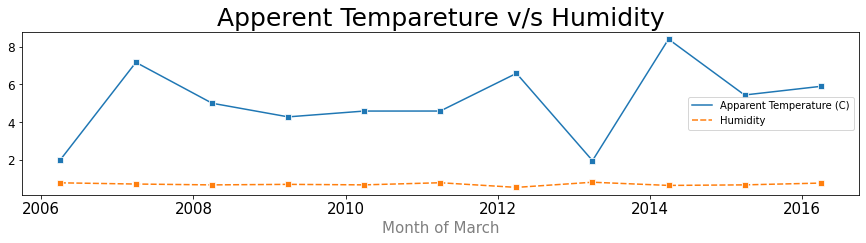

In [15]:
mar_data = w_data[w_data.index.month==3]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of March", fontsize=15, color="gray")
sns.lineplot(data=mar_data, marker='s')

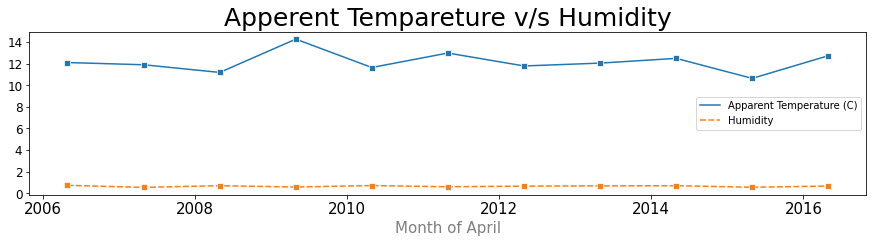

In [16]:
ar_data = w_data[w_data.index.month==4]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of April", fontsize=15, color="gray")
sns.lineplot(data=ar_data, marker='s')

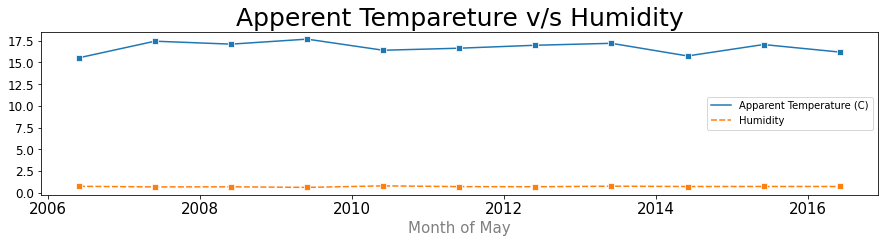

In [17]:
may_data = w_data[w_data.index.month==5]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of May", fontsize=15, color="gray")
sns.lineplot(data=may_data, marker='s')

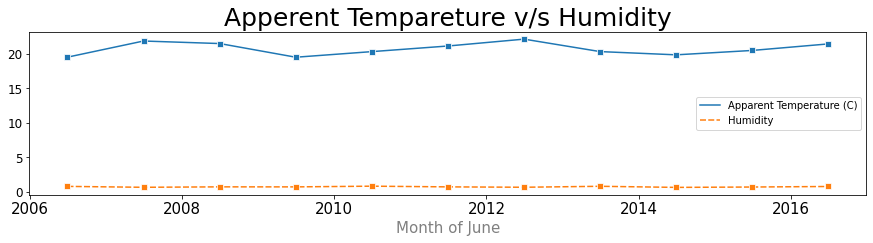

In [18]:
j_data = w_data[w_data.index.month==6]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of June", fontsize=15, color="gray")
sns.lineplot(data=j_data, marker='s')

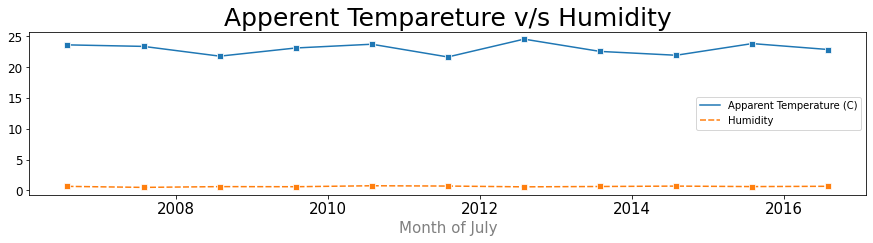

In [19]:
july_data = w_data[w_data.index.month==7]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of July", fontsize=15, color="gray")
sns.lineplot(data=july_data, marker='s')

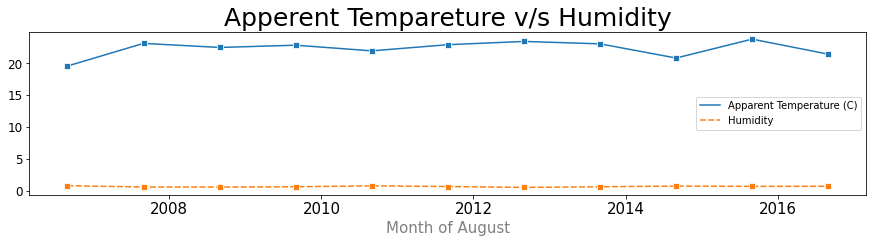

In [20]:
a_data = w_data[w_data.index.month==8]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of August", fontsize=15, color="gray")
sns.lineplot(data=a_data, marker='s')

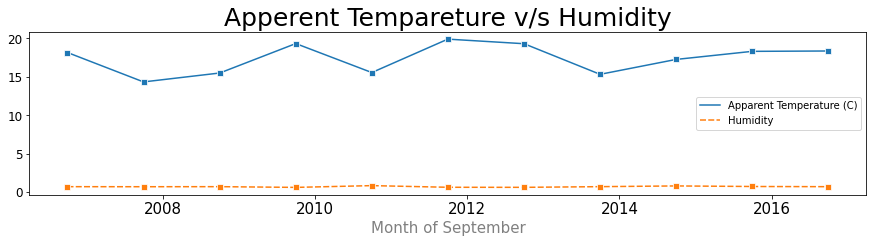

In [21]:
sep_data = w_data[w_data.index.month==9]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of September", fontsize=15, color="gray")
sns.lineplot(data=sep_data, marker='s')

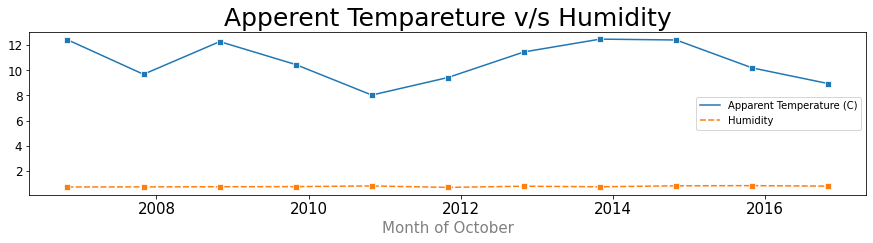

In [22]:
oct_data = w_data[w_data.index.month==10]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of October", fontsize=15, color="gray")
sns.lineplot(data=oct_data, marker='s')

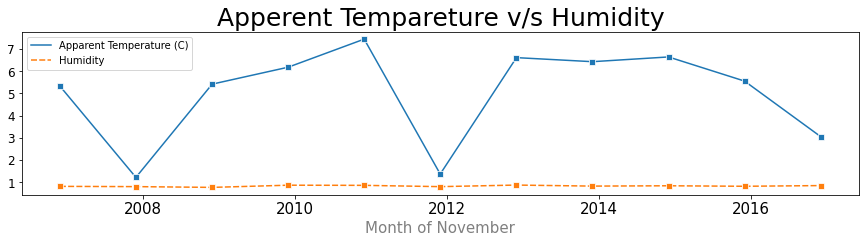

In [23]:
nov_data = w_data[w_data.index.month==11]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of November", fontsize=15, color="gray")
sns.lineplot(data=nov_data, marker='s')

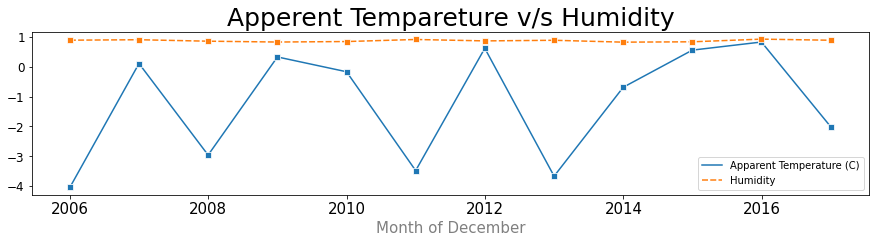

In [24]:
dec_data = w_data[w_data.index.month==12]
plt.figure(figsize=(15, 3))
plt.title("Apperent Tempareture v/s Humidity", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Month of December", fontsize=15, color="gray")
sns.lineplot(data=dec_data, marker='s')

### Relplot


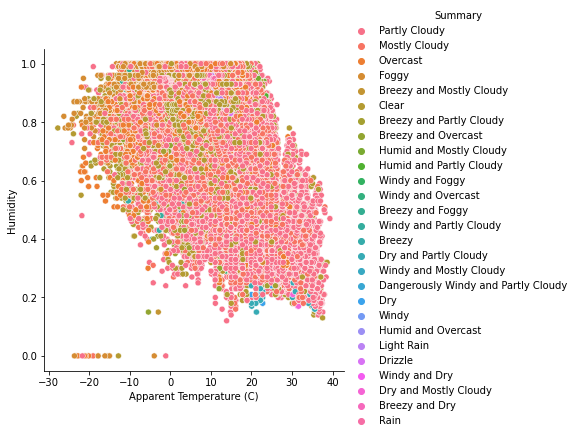

In [6]:

sns.relplot(
    data=w_data,
    x="Apparent Temperature (C)",y="Humidity",hue="Summary"
)

### Conclusion


H0 is not accepted because there is no change in Humidity from 2006–2016. So, we will accept the H1.

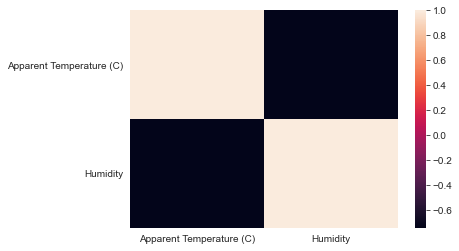

In [58]:
correlation = w_data.corr()
sns.heatmap(correlation)